In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 

## Load Data

In [2]:
df=pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.describe().round(2)

,math score,reading score,writing score
count,1000.00,1000.00,1000.00
mean,66.09,69.17,68.05
std,15.16,14.60,15.20
min,0.00,17.00,10.00
25%,57.00,59.00,57.75
50%,66.00,70.00,69.00
75%,77.00,79.00,79.00
max,100.00,100.00,100.00


In [5]:
df.describe(include='O')

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

## Data cleaning 

In [8]:
for col in df.columns:
    print(col)
    print(df[col].nunique())
    print(df[col].unique())
    print('\n','*'*100,'\n')

gender
2
['female' 'male']

 **************************************************************************************************** 

race/ethnicity
5
['group B' 'group C' 'group A' 'group D' 'group E']

 **************************************************************************************************** 

parental level of education
6
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

 **************************************************************************************************** 

lunch
2
['standard' 'free/reduced']

 **************************************************************************************************** 

test preparation course
2
['none' 'completed']

 **************************************************************************************************** 

math score
81
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77 

In [9]:
print(df['math score'].min(), df['math score'].max())
print('Zeros:', (df['math score'] == 0).sum())


0 100
Zeros: 1


In [10]:
df['math score'].dtype

dtype('int64')

In [11]:
df[df['math score']==0]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10


In [12]:
df = df[df['math score'] != 0].reset_index(drop=True)

## check for categorical data

In [13]:
cat_col=df.select_dtypes(include='O').columns
cat_col

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

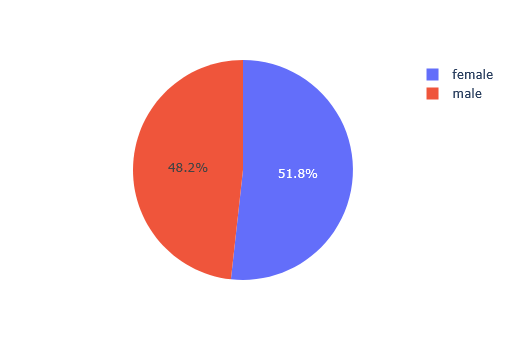

In [14]:
px.pie(df,names='gender')

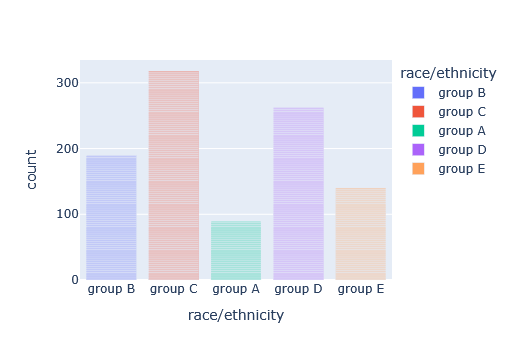

In [15]:
px.bar(df,x='race/ethnicity',color='race/ethnicity')

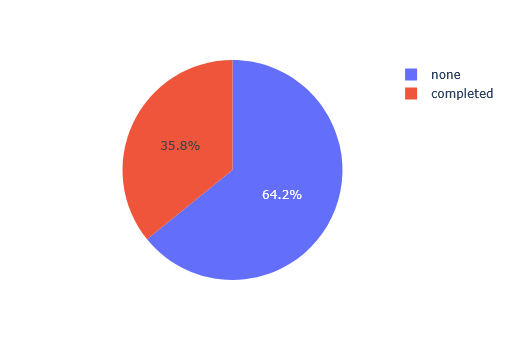

In [16]:
px.pie(df,names='test preparation course')

In [17]:
for col in cat_col:
    print(col)
    print(df[col].nunique())
    print(df[col].unique())
    print('\n','*'*100,'\n')

gender
2
['female' 'male']

 **************************************************************************************************** 

race/ethnicity
5
['group B' 'group C' 'group A' 'group D' 'group E']

 **************************************************************************************************** 

parental level of education
6
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

 **************************************************************************************************** 

lunch
2
['standard' 'free/reduced']

 **************************************************************************************************** 

test preparation course
2
['none' 'completed']

 **************************************************************************************************** 



## chech for numerical_cols

In [18]:
num_cols=df.select_dtypes(include='number').columns
num_cols

Index(['math score', 'reading score', 'writing score'], dtype='object')

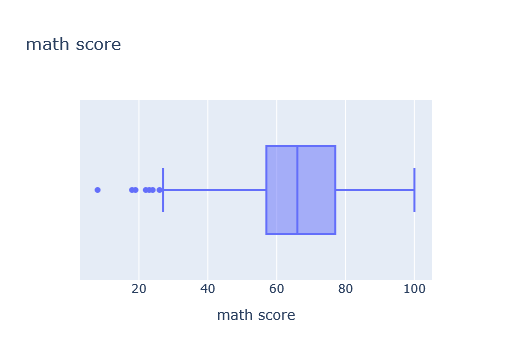

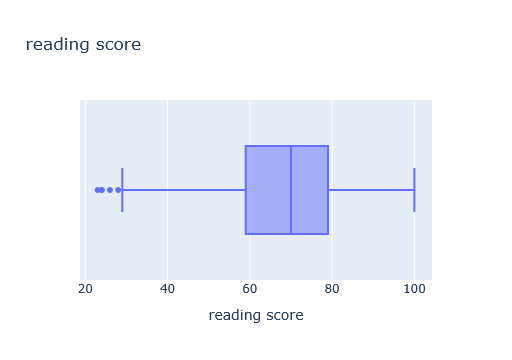

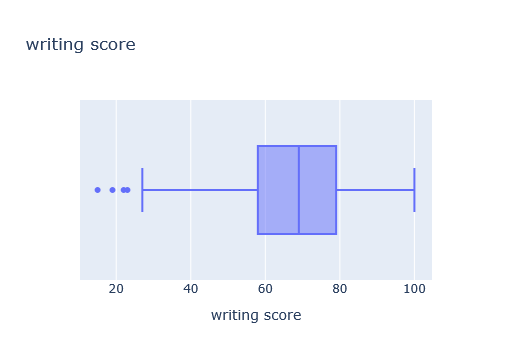

In [19]:
for col in num_cols:
    px.box(df,x=col,title=col).show()

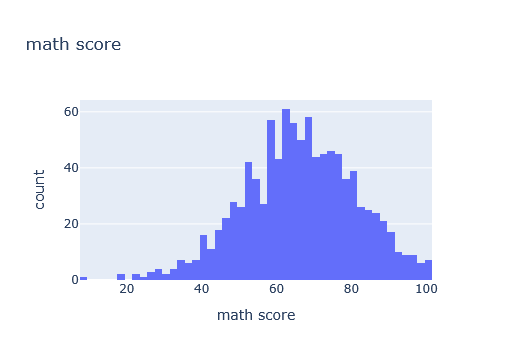

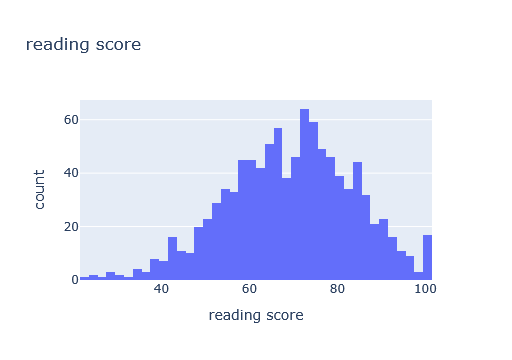

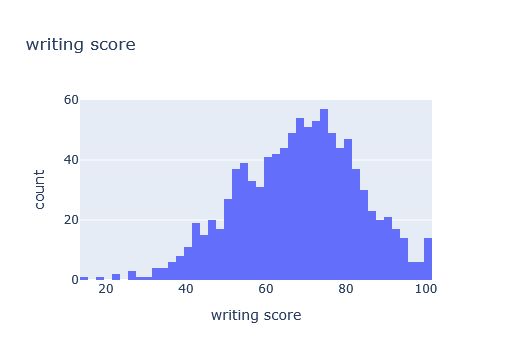

In [20]:
for col in num_cols:
    px.histogram(df,x=col,title=col).show()

## Featture Enginerring 

In [21]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [22]:
df['average_score'] = df[['math score','reading score','writing score']].mean(axis=1)

In [23]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
994,female,group E,master's degree,standard,completed,88,99,95,94.000000
995,male,group C,high school,free/reduced,none,62,55,55,57.333333
996,female,group C,high school,free/reduced,completed,59,71,65,65.000000
997,female,group D,some college,standard,completed,68,78,77,74.333333


## SPliting

In [24]:
x=df.drop('average_score',axis=1)
y=df['average_score']

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [26]:
x_train

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
778,male,group E,associate's degree,standard,completed,94,85,82
286,female,group B,some high school,standard,none,67,89,82
165,male,group C,high school,free/reduced,completed,53,51,51
960,female,group D,some high school,free/reduced,none,48,54,53
493,female,group B,high school,standard,none,54,64,68
...,...,...,...,...,...,...,...,...
106,male,group E,associate's degree,standard,completed,66,63,64
270,male,group C,some college,standard,none,58,49,42
860,female,group E,master's degree,free/reduced,none,81,86,87
435,male,group D,associate's degree,standard,none,75,68,64


In [27]:
x_test

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
453,female,group C,associate's degree,free/reduced,none,53,61,62
793,female,group B,high school,standard,none,42,52,51
209,male,group D,some high school,free/reduced,completed,80,79,79
309,female,group B,associate's degree,standard,none,73,76,80
740,female,group A,associate's degree,free/reduced,none,37,57,56
...,...,...,...,...,...,...,...,...
78,female,group E,master's degree,standard,none,62,68,68
29,female,group D,master's degree,standard,none,62,70,75
277,female,group C,some high school,free/reduced,none,65,86,80
261,female,group C,some high school,free/reduced,none,44,50,51


## cat_col

In [28]:
x_train[cat_col]

,gender,race/ethnicity,parental level of education,lunch,test preparation course
778,male,group E,associate's degree,standard,completed
286,female,group B,some high school,standard,none
165,male,group C,high school,free/reduced,completed
960,female,group D,some high school,free/reduced,none
493,female,group B,high school,standard,none
...,...,...,...,...,...
106,male,group E,associate's degree,standard,completed
270,male,group C,some college,standard,none
860,female,group E,master's degree,free/reduced,none
435,male,group D,associate's degree,standard,none


In [29]:
for col in cat_col:
    print(col)
    print(x_train[col].nunique())

gender
2
race/ethnicity
5
parental level of education
6
lunch
2
test preparation course
2


In [30]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop='first',sparse_output=False)
ohe_train_arr=ohe.fit_transform(x_train[['gender', 'race/ethnicity', 'lunch', 'test preparation course']])
ohe_test_arr=ohe.transform(x_test[['gender', 'race/ethnicity', 'lunch', 'test preparation course']])

In [31]:
ohe_train_df=pd.DataFrame(
    ohe_train_arr,columns=ohe.get_feature_names_out(), index=x_train.index
)

In [32]:
ohe_test_df=pd.DataFrame(
     ohe_test_arr,columns=ohe.get_feature_names_out(), index=x_test.index
)

In [33]:
x_train=pd.concat([x_train,ohe_train_df],axis=1).drop(['gender', 'race/ethnicity', 'lunch', 'test preparation course'],axis=1)
x_test=pd.concat([x_test,ohe_test_df],axis=1).drop(['gender', 'race/ethnicity', 'lunch', 'test preparation course'],axis=1)

In [34]:
x_train

,parental level of education,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_standard,test preparation course_none
778,associate's degree,94,85,82,1.0,0.0,0.0,0.0,1.0,1.0,0.0
286,some high school,67,89,82,0.0,1.0,0.0,0.0,0.0,1.0,1.0
165,high school,53,51,51,1.0,0.0,1.0,0.0,0.0,0.0,0.0
960,some high school,48,54,53,0.0,0.0,0.0,1.0,0.0,0.0,1.0
493,high school,54,64,68,0.0,1.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
106,associate's degree,66,63,64,1.0,0.0,0.0,0.0,1.0,1.0,0.0
270,some college,58,49,42,1.0,0.0,1.0,0.0,0.0,1.0,1.0
860,master's degree,81,86,87,0.0,0.0,0.0,0.0,1.0,0.0,1.0
435,associate's degree,75,68,64,1.0,0.0,0.0,1.0,0.0,1.0,1.0


In [35]:
x_train.duplicated().sum()

np.int64(0)

In [36]:
# parental level of education col دا اللفاضل قي الcategorical col 
#  لسه فاضل الnumeric 
from sklearn.preprocessing import OrdinalEncoder


In [37]:
# the cooleration between parental level of education and the students degrees

In [38]:
# # the cooleration between parental level of education and the students degrees to know it (ordinal or nominal)
# df.groupby('parental level of education')[['math score','reading score','writing score']].mean()

In [39]:
cat_col

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [40]:
from sklearn.preprocessing import OrdinalEncoder
education_order = [[
    'some high school',
    'high school',
    "associate's degree",
    'some college',
    "bachelor's degree",
    "master's degree"
]]
ord_enc=OrdinalEncoder(categories=education_order)
x_train['parental level of education']=ord_enc.fit_transform(x_train[['parental level of education']])
x_test['parental level of education']=ord_enc.transform(x_test[['parental level of education']])

## numeric cols

In [41]:
num_cols

Index(['math score', 'reading score', 'writing score'], dtype='object')

In [45]:
x_train=x_train.drop(columns=num_cols,errors='ignore')
x_test=x_test.drop(columns=num_cols,errors='ignore')


Index(['parental level of education', 'gender_male', 'race/ethnicity_group B',
       'race/ethnicity_group C', 'race/ethnicity_group D',
       'race/ethnicity_group E', 'lunch_standard',
       'test preparation course_none'],
      dtype='object')

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
ln=LinearRegression()
ln.fit(x_train,y_train)


R² score on test set: 0.06181779980034696


In [54]:
ln.predict(x_train)

array([76.96676153, 65.34018157, 61.86857269, 59.23868866, 67.03910983,
       69.48027334, 55.10721805, 74.04196512, 65.34880273, 66.08241682,
       74.12433864, 68.004424  , 71.09682808, 58.29253572, 75.8232669 ,
       72.32269622, 72.53523507, 61.69039223, 69.99286803, 70.62376796,
       68.66428573, 75.8232669 , 76.48852522, 71.69179629, 59.23868866,
       72.32269622, 67.78134508, 59.83507887, 69.88153272, 61.90293109,
       68.95919809, 70.43696635, 72.13589461, 67.04773099, 75.93309159,
       64.60656748, 52.77881186, 70.83630681, 59.02614981, 66.0000433 ,
       78.66568978, 69.61043867, 59.83507887, 74.96777742, 71.17920159,
       53.19575094, 69.99286803, 66.03440169, 68.73803809, 59.23868866,
       76.66670568, 60.20400283, 65.25780806, 62.42400633, 73.83482287,
       71.39174044, 76.48852522, 73.05631031, 68.73803809, 56.59360746,
       72.35705461, 64.33547344, 72.87812985, 61.53400713, 68.21156626,
       62.63654518, 81.5509516 , 67.78134508, 65.34018157, 56.17

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# ohe=OneHotEncoder(drop='first',sparse_output=False)
# ohe_arr=ohe.fit_transform(df[['race/ethnicity']])

In [ ]:
# df_ohe=pd.DataFrame(ohe_arr,columns=ohe.get_feature_names_out())
# df_ohe

In [ ]:
 # pd.concat([df, df_ohe], axis=1).drop(columns=['race/ethnicity'])


In [ ]:
# education_order = {
#     'some high school': 0,
#     'high school': 1,
#     "associate's degree": 2,
#     'some college': 3,
#     "bachelor's degree": 4,
#     "master's degree": 5
# }

# df['parental level of education'] = df['parental level of education'].map(education_order)


In [ ]:
# https://chatgpt.com/share/68cef11b-c534-8008-b6ba-19e56a5ce7df